Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.
Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Скачайте датасет и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python. Загрузите датасет в pandas DataFrame под названием df. 

In [2]:
path = '/home/nic/train.csv'
df = pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Выполните предварительную обработку данных, выполнив следующие шаги: 
a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

In [5]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

По количеству отсутствующих значений можно выделить две категории: 
1. отсутствие более половины значений в столбцах. Для этих столбцов значение Null является значением, заменим на подобное, 
не воспринимаемое pandas как None.
2. отсутствеи менее 10 % значений в столцах. Решение просмотреть с чем связана потеря данных, выработать индивидуальный подход
3. в столбце "LotFrontage" отсутствует около 20% значений. Решение заполнить его после выполнения первых двух задач

In [6]:
df.fillna({'Alley': 'No', 'MasVnrType': 'No', 'FireplaceQu': 'No', 'PoolQC': 'No', 'Fence': 'No', 'MiscFeature': 'No'}, inplace=True)
# df.drop('Alley', axis= 1 , inplace= True )
# df.drop('MasVnrType', axis= 1 , inplace= True )
# df.drop('FireplaceQu', axis= 1 , inplace= True )
# df.drop('PoolQC', axis= 1 , inplace= True )
# df.drop('Fence', axis= 1 , inplace= True )
# df.drop('MiscFeature', axis= 1 , inplace= True )
pd.isna(df).sum()[pd.isna(df).sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [7]:
rf = df[['MasVnrArea', 'MasVnrType' ]]
null_rows = rf.loc[df['MasVnrArea'].isnull()]
null_rows.head(10)


,MasVnrArea,MasVnrType
234,NaN,No
529,NaN,No
650,NaN,No
936,NaN,No
973,NaN,No
977,NaN,No
1243,NaN,No
1278,NaN,No


In [8]:
df.fillna({'MasVnrArea': 0.0, 'BsmtQual': 'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 
          'BsmtFinType1': 'No Basement', 'BsmtFinType2':'No Basement'}, inplace=True)

In [9]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

LotFrontage     259
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [10]:
df.fillna({'GarageType': 'No Garage', 'GarageYrBlt': 'No Garage', 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage', 
          'GarageCond': 'No Garage'}, inplace=True)

In [11]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

LotFrontage    259
Electrical       1
dtype: int64

In [12]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [13]:
df.fillna({'Electrical': 'SBrkr'}, inplace=True)

In [14]:
rf = df[['LotFrontage']]
null_rows = rf.loc[df['LotFrontage'].notnull()]
null_rows.head()

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0


(array([ 42.,  42.,  48., 112., 211., 146., 205., 183.,  78.,  56.,  31.,
         10.,  13.,   8.,   4.,   3.,   2.,   1.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([ 21.        ,  29.11111111,  37.22222222,  45.33333333,
         53.44444444,  61.55555556,  69.66666667,  77.77777778,
         85.88888889,  94.        , 102.11111111, 110.22222222,
        118.33333333, 126.44444444, 134.55555556, 142.66666667,
        150.77777778, 158.88888889, 167.        , 175.11111111,
        183.22222222, 191.33333333, 199.44444444, 207.55555556,
        215.66666667, 223.77777778, 231.88888889, 240.        ,
        248.11111111, 256.22222222, 264.33333333, 272.44444444,
        280.55555556, 288.66666667, 296.77777778, 304.88888889,
        313.        ]),
 <BarContainer object of 36 artists>)

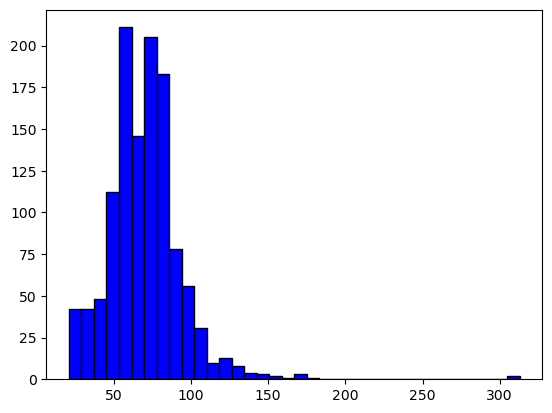

In [15]:
plt.hist(rf['LotFrontage'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


In [16]:
mode_lf = df['LotFrontage'].mode()[0]
df['LotFrontage'].fillna(mode_lf, inplace=True)

In [17]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

b. Проверьте и обработайте любые дублирующиеся строки в датасете. 

In [18]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-null  

Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [20]:
num = LabelEncoder()
old_df = df.copy(deep=True)
df['MSZoning'] = num.fit_transform(df['MSZoning'].astype(str))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000


In [21]:
old_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000


In [24]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
column_names = df_non_numeric.keys().tolist()
for name in column_names:
    df[name] = num.fit_transform(df[name].astype(str))


Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

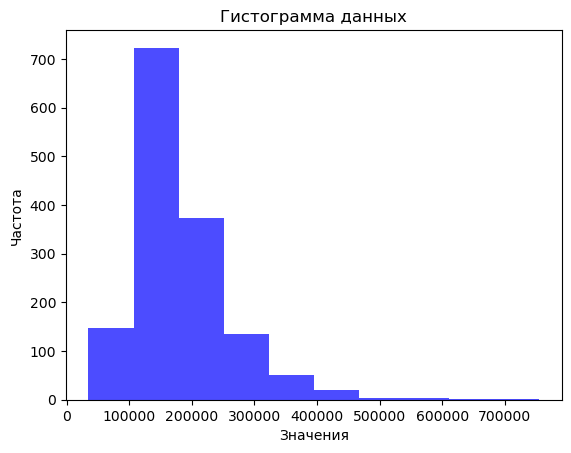

In [25]:
intent = df['SalePrice']
plt.hist(intent, bins=10, color='blue', alpha=0.7)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()


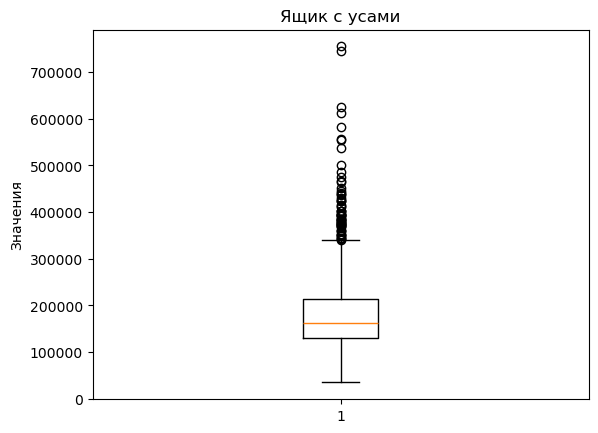

In [26]:
plt.boxplot(intent)
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

<Axes: >

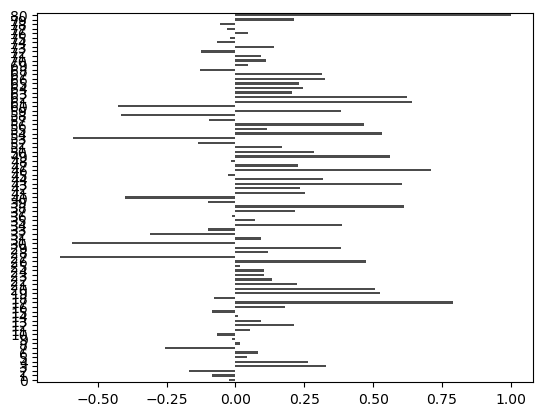

In [42]:
list_intent = intent.tolist()
column_names = df.keys().tolist()
correlation_list = []
for name in column_names:
    correlation_list.append(np.corrcoef(list_intent, df[name].tolist())[0, 1])
data = pd.Series(correlation_list)
data.plot.barh(color='k', alpha=0.7)

In [41]:
list_index = []
for i in range(len(correlation_list)):
    if correlation_list[i] >= 0.7 or correlation_list[i] <= -0.7:
        list_index.append(i)
print([column_names[i] for i in list_index])

['OverallQual', 'GrLivArea', 'SalePrice']


Между целевой переменной и 'OverallQual', 'GrLivArea' есть сильные корреляции (коэффициент корреляции Пирсона 0,7 и больше)

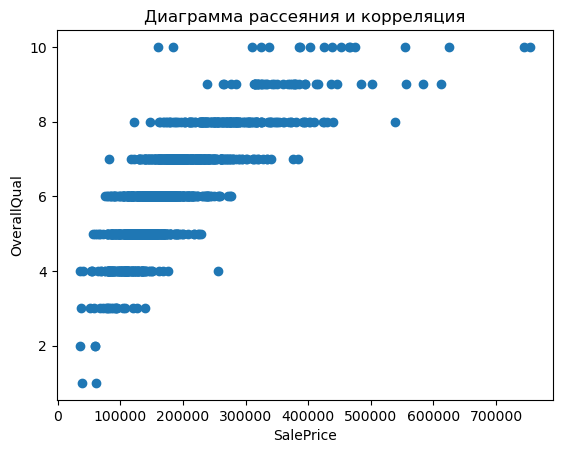

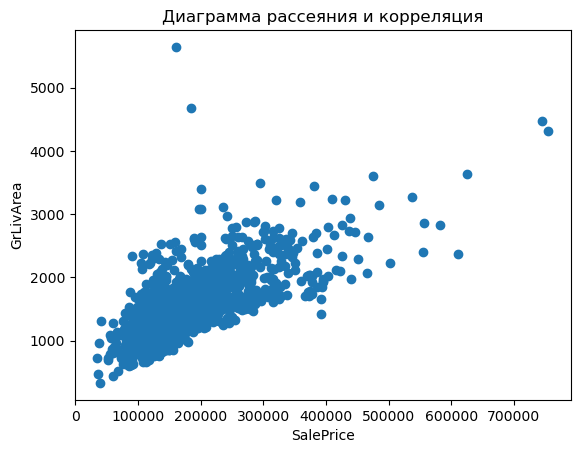

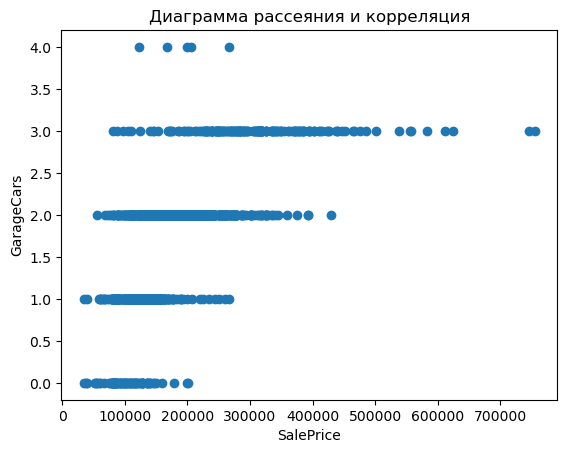

In [48]:
x = intent
compare = ['OverallQual', 'GrLivArea', 'GarageCars']
for y in compare:
    plt.scatter(x, df[y])
    plt.xlabel('SalePrice')
    plt.ylabel(y)
    plt.title('Диаграмма рассеяния и корреляция')
    plt.show()

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [50]:
general_sq = ['1stFlrSF', '2ndFlrSF']
df['general_sq'] = df[general_sq]. sum (axis= 1 )
print(np.corrcoef(list_intent, df['general_sq'].tolist())[0, 1])

0.7168830793692805


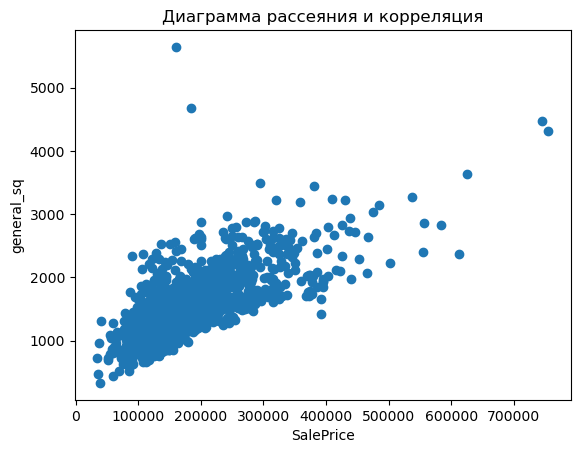

In [51]:
plt.scatter(x, df['general_sq'])
plt.xlabel('SalePrice')
plt.ylabel('general_sq')
plt.title('Диаграмма рассеяния и корреляция')
plt.show()

Между целевой переменной и общей площадью есть сильная корреляция (коэффициент корреляции Пирсона 0,716)

In [52]:
df.to_csv("cleaned_house_prices.csv")